In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('darkgrid')
import warnings
warnings.filter.warnings('ignore')

In [3]:
df = pd.read_excel('Fracability_Dataset.xlsx')

In [4]:
df.head()

,MD_ft,Resistivity,YM/PR,GR,Minimum Horizontal Stress Gradient,Fracability
0,13472.772070,466.626844,16.341279,481.414851,0.703538,1
1,9370.348405,577.253950,15.403192,324.750529,0.497242,0
2,10634.130671,439.087333,26.528042,265.034727,0.766302,0
3,18194.375034,309.679533,18.789840,169.480991,1.218154,1
4,18861.977710,614.959877,18.048478,480.189015,1.171049,1


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MD_ft,1000.0,14000.000000,4269.740397,2571.139190,10943.676726,13864.280896,17149.039581,25382.097071
Resistivity,1000.0,500.000000,179.604705,-2.624400,364.746085,497.077253,620.324542,970.103975
YM/PR,1000.0,24.000000,8.388762,4.917917,17.708133,23.399724,29.588017,49.567271
GR,1000.0,300.000000,122.443017,-2.296323,210.515488,302.737171,387.137024,627.305824
Minimum Horizontal Stress Gradient,1000.0,0.926601,0.234990,0.292125,0.747472,0.932445,1.106538,1.508552
Fracability,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


In [7]:
df.columns

Index(['MD_ft', 'Resistivity', 'YM/PR', 'GR',
       'Minimum Horizontal Stress Gradient', 'Fracability'],
      dtype='object')

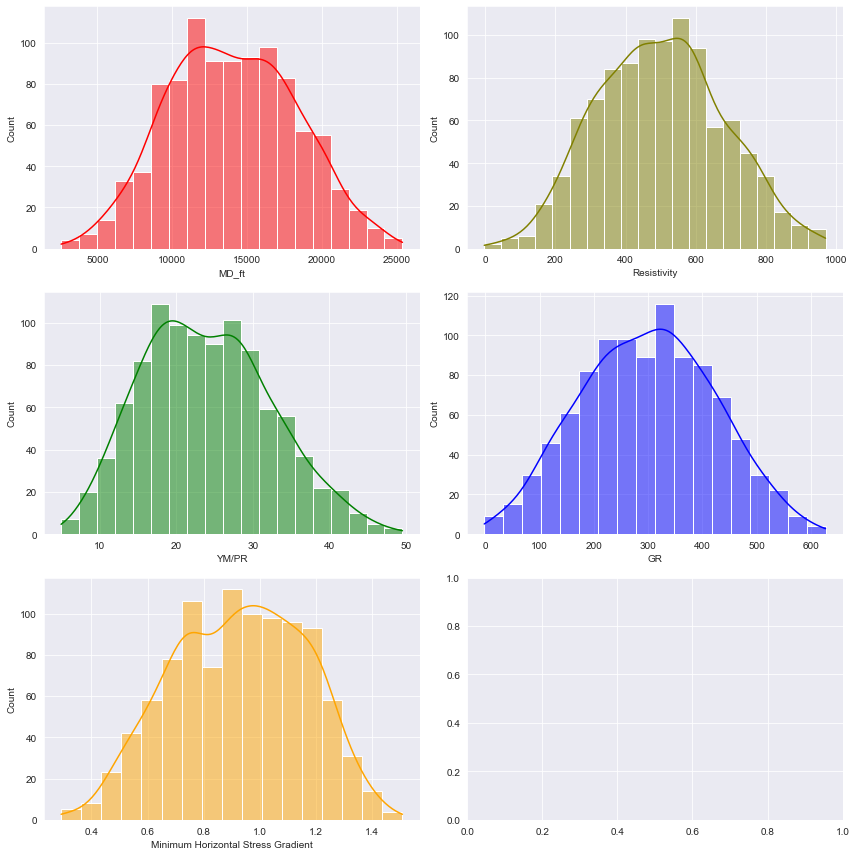

In [10]:
f, axes = plt.subplots(3,2, figsize=(12,12))
sns.histplot(df['MD_ft'], kde=True,color='red',ax=axes[0,0])
sns.histplot(df['Resistivity'], kde=True,color='olive',ax=axes[0,1])
sns.histplot(df['YM/PR'], kde=True,color='green',ax=axes[1,0])
sns.histplot(df['GR'],kde=True, color='blue',ax=axes[1,1])
sns.histplot(df['Minimum Horizontal Stress Gradient'],kde=True, color='orange',ax=axes[2,0])

plt.tight_layout()


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

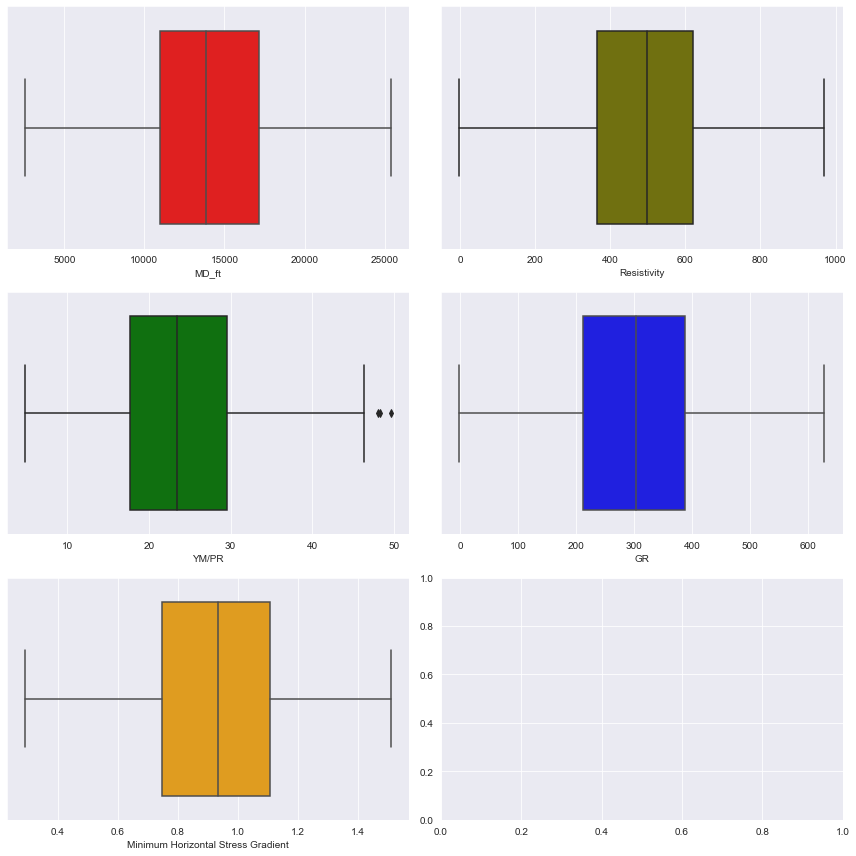

In [13]:
f, axes = plt.subplots(3,2, figsize=(8,8))
sns.boxplot(df['MD_ft'],color='red',ax=axes[0,0])
sns.boxplot(df['Resistivity'],color='olive',ax=axes[0,1])
sns.boxplot(df['YM/PR'],color='green',ax=axes[1,0])
sns.boxplot(df['GR'], color='blue',ax=axes[1,1])
sns.boxplot(df['Minimum Horizontal Stress Gradient'], color='orange',ax=axes[2,0])

plt.tight_layout()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

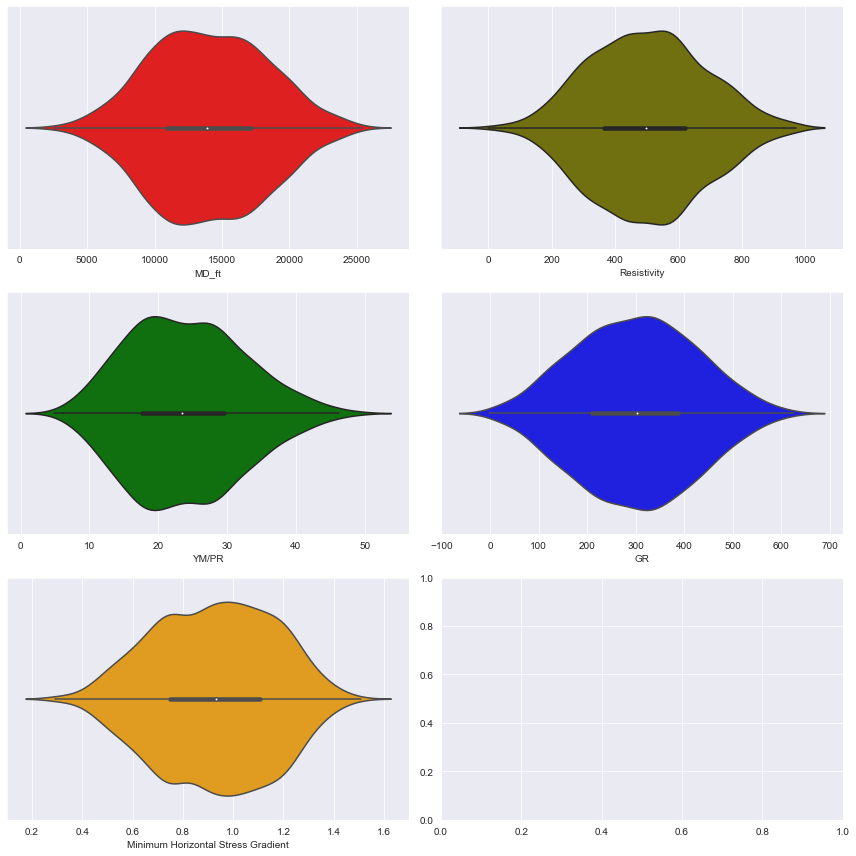

In [15]:
f, axes = plt.subplots(3,2, figsize=(8,8))
sns.violinplot(df['MD_ft'],color='red',ax=axes[0,0])
sns.violinplot(df['Resistivity'],color='olive',ax=axes[0,1])
sns.violinplot(df['YM/PR'],color='green',ax=axes[1,0])
sns.violinplot(df['GR'], color='blue',ax=axes[1,1])
sns.violinplot(df['Minimum Horizontal Stress Gradient'], color='orange',ax=axes[2,0])

plt.tight_layout()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


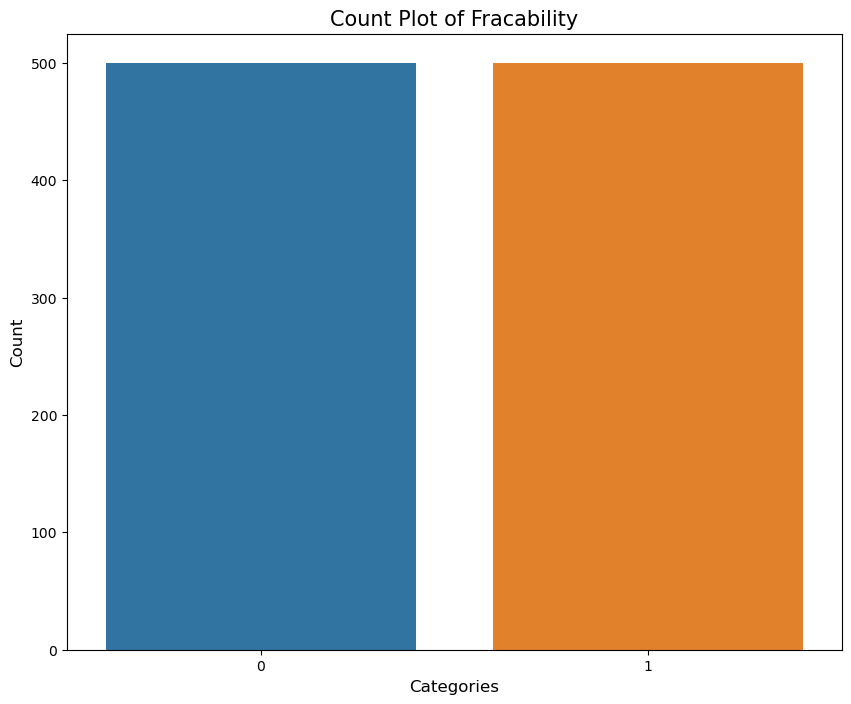

In [17]:
plt.figure(figsize=(5,5))
plt.style.use('default')
sns.countplot(df['Fracability'])
plt.title('Count Plot of Fracability', size=15)
plt.xlabel('Categories', size=12)
plt.ylabel('Count', size=12)

plt.show()

<AxesSubplot:>

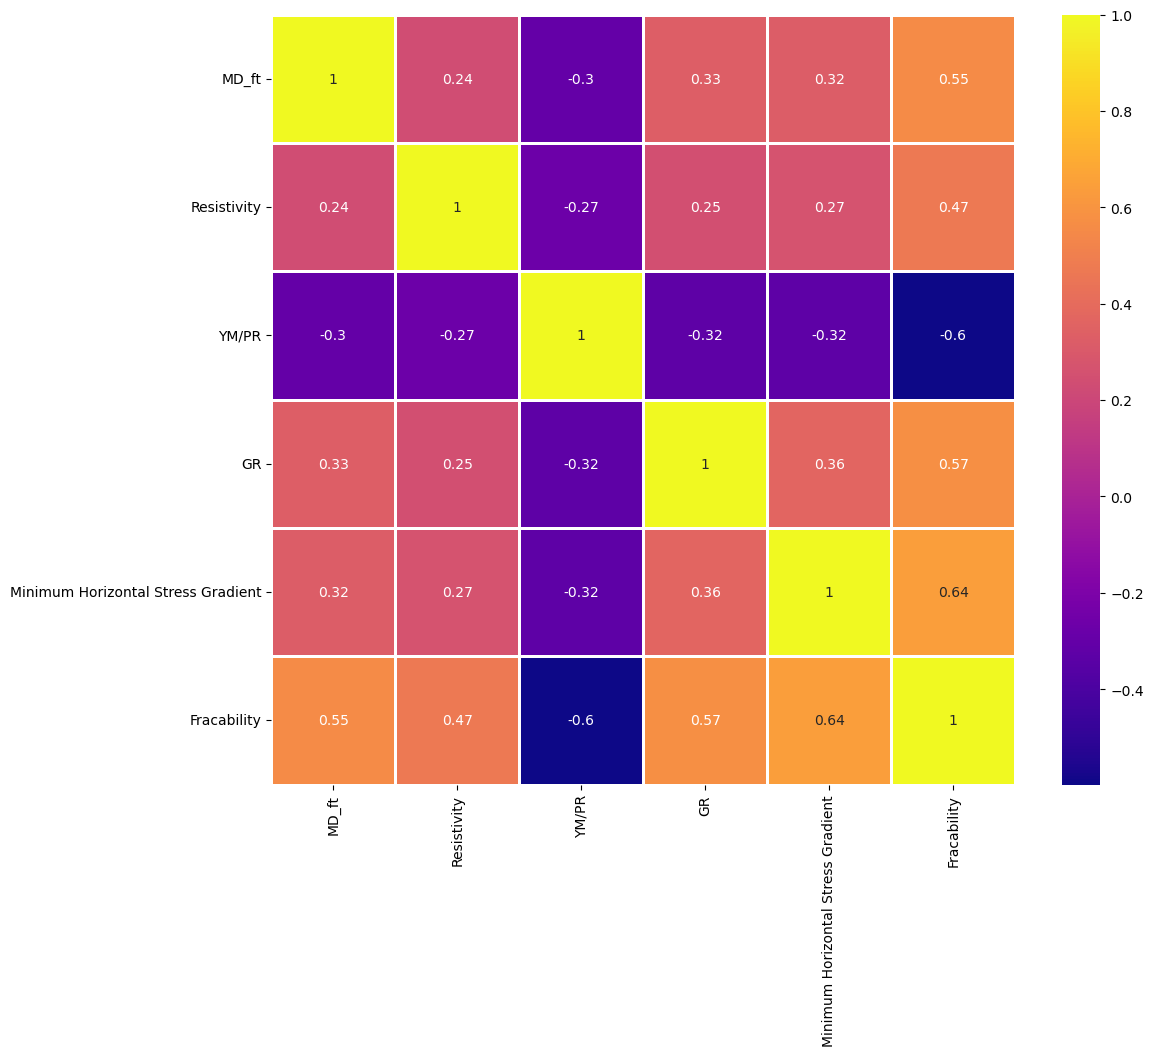

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),lw=2, annot=True,cmap='plasma')

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))


In [22]:
y = df['Fracability']
x=df.drop(['Fracability'],axis=1)

x_scaled = scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled

array([[0.4779121 , 0.48240727, 0.25584607, 0.76828069, 0.33821385],
       [0.29806768, 0.59613595, 0.23483597, 0.51945003, 0.16862214],
       [0.3534701 , 0.45409566, 0.48399637, 0.42460314, 0.38981083],
       ...,
       [0.62109238, 0.6114045 , 0.39372412, 0.93935925, 0.36436871],
       [0.58840762, 0.69808704, 0.15223219, 0.48728734, 0.59998625],
       [0.42850058, 0.62668706, 0.15857854, 0.59050528, 0.58665816]])

### Train Test Split

In [24]:
seed=50
np.random.seed(seed)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

## Support Vector Machine

In [23]:
from sklearn.svm import SVC


In [35]:
np.random.seed(seed)

svm = SVC()

In [36]:
# train the model
svm.fit(x_train,y_train)

SVC()

In [37]:
svm_pred = svm.predict(x_test)

In [38]:
# Model evaluations
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [39]:
cm = confusion_matrix(y_test,svm_pred)
print('Accuracy Score:', accuracy_score(y_test,svm_pred))
print('\nConfusion Matrix:')
print(cm)

Accuracy Score: 0.75

Confusion Matrix:
[[111  31]
 [ 44 114]]


In [40]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       142
           1       0.79      0.72      0.75       158

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



In [41]:
pd.crosstab(y_test,svm_pred)

col_0,0,1
Fracability,,
0,111,31
1,44,114


## Let's improve the SVC model using GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV

In [44]:
params_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [45]:
grid = GridSearchCV(SVC(),params_grid,refit=True,verbose=3)

In [46]:
# Train the model again

grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.507 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.514 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.514 total time=   0.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.514 total time=   0.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.2s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.2s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.514 total time=   0.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.514 total time=   0.2s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.507 total time=   0.2s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.514 total time=   0.2s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [47]:
grid_pred = grid.predict(x_test)

In [48]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [49]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [50]:
grid.best_score_

0.7571428571428571

In [54]:
print('Crosstab:')
print('Accuracy Score:', accuracy_score(y_test,grid_pred))
pd.crosstab(y_test,grid_pred)

Crosstab:
Accuracy Score: 0.7933333333333333


col_0,0,1
Fracability,,
0,130,12
1,50,108


In [52]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       142
           1       0.90      0.68      0.78       158

    accuracy                           0.79       300
   macro avg       0.81      0.80      0.79       300
weighted avg       0.82      0.79      0.79       300



The accuracy score has improved from 75% to 79%

<AxesSubplot:>

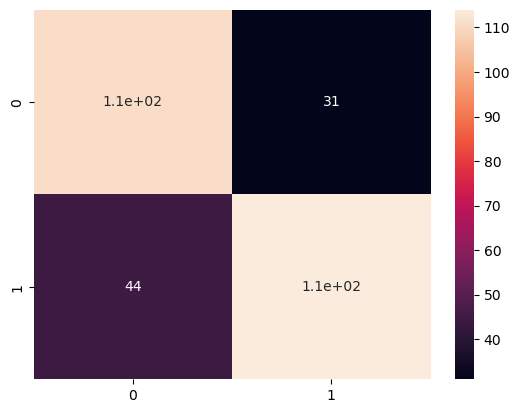

In [61]:
sns.heatmap(cm,annot=True)

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier()

In [57]:
#train the rf model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
rf_pred =rf.predict(x_test)

In [59]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       142
           1       0.97      0.92      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [64]:
pd.crosstab(y_test,rf_pred)


col_0,0,1
Fracability,,
0,137,5
1,13,145


The accuracy score of the model is 94%

<AxesSubplot:>

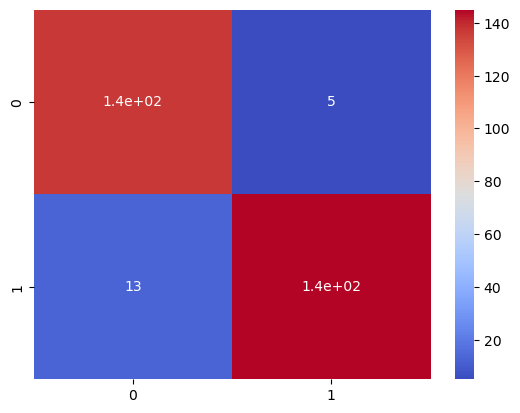

In [62]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,cmap='coolwarm')